# Auto-Correction Exercise

This exercise will guide you through building an auto-correct system in Python. Follow the instructions in each step to complete the implementation.

## Step 1: Import Libraries

Import the necessary libraries

In [45]:
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
import nltk

## Step 2: Load Data

Load a trusted text corpus to build the auto-correct system.

In [46]:
with open('eng-uk_web_2002_10K-sentences.txt', 'r', encoding='ISO-8859-1') as f:
    file = f.readlines()

file[0][:4000]

"11204341\tConsider the extras not usually included with any 'FREE' car offer: CDW/LDW @ $12.95 to $13.95 a day.\n"

## Step 3: Data Processing

Tokenize the text and convert all characters to lowercase to clean the data.

In [47]:
def process_data(lines):
    words = []
    for line in lines:
        line = line.strip().lower()
        word = re.findall(r'\w+', line)
        words.extend(word)
    return words

word_l = process_data(file)
vocab = set(word_l)
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['11204341', 'consider', 'the', 'extras', 'not', 'usually', 'included', 'with', 'any', 'free']
There are 32201 unique words in the vocabulary.



## Step 4: Architecture Overview

This auto-correct architecture has four main components:

1. **Filtering Mispells**: Check if a word is in the vocabulary.
2. **Word Suggestion Mechanism**: Suggest candidate words based on various edit operations.
3. **Probability Distribution Mechanism**: Calculate the probability of each candidate word.
4. **Replace Mispells**: Replace the misspelled word with the most probable suggestion.

Implement each part step-by-step in the cells below.


### Step 4.1: Filtering Mispells

Write a function to identify words not present in the vocabulary.

In [48]:
def find_wrong_word(sent, vocab):
    wrong_words = []
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
            wrong_words.append(word)
    return wrong_words

find_wrong_word('he is goinng home', vocab)


['goinng']

### Step 4.2: Word Suggestion Mechanism

Implement functions to suggest words by deleting, switching, replacing, or inserting characters.

In [49]:
def delete_letter(word, verbose=False):
    delete_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    delete_l = [s[0]+s[1][1:] for s in split_l]
    if verbose: print(f"input word : {word} \nsplit_l = {split_l}, \ndelete_l = {delete_l}")
    return delete_l

delete_word_l = delete_letter(word="cans", verbose=True)


input word : cans 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [50]:
def switch_letter(word, verbose=False):
    switch_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) > 2:
            temp = s[0] + s[1][1] + s[1][0] + s[1][2:]
        elif len(s[1]) == 2:
            temp = s[0] + s[1][1] + s[1][0]
        elif len(s[1]) == 1:
            continue
        switch_l.append(temp)
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}")
    return switch_l

switch_word_l = switch_letter(word="eta", verbose=True)


Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a')] 
switch_l = ['tea', 'eat']


In [51]:
def replace_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) == 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l)
        elif len(s[1]) > 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l + s[1][1:])
    replace_set = set(replace_l)
    replace_l = sorted(list(replace_set))
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l = {replace_l}")
    return replace_l

replace_l = replace_letter(word='can', verbose=True)


Input word = can 
split_l = [('', 'can'), ('c', 'an'), ('ca', 'n')] 
replace_l = ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan']


In [52]:

def insert_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    for s in split_l:
        for l in letters:
            insert_l.append(s[0] + l + s[1])
    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    return insert_l

insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")


Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


**Combining Functions for Word Suggestions**

Combine the functions to edit one or two characters in a word.

In [53]:
def edit_one_letter(word,allow_switches=True):
    edit_one_set = set()
    insert_l = insert_letter(word)
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    switch_l = switch_letter(word)
    if allow_switches:
        ans = insert_l + delete_l + replace_l +switch_l
    else:
        ans = insert_l + delete_l + replace_l
    edit_one_set = set(ans)
    return edit_one_set

In [54]:
def edit_one_letter(word, allow_switches=True):
    edit_one_set = set()
    insert_l = insert_letter(word)
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    switch_l = switch_letter(word)
    if allow_switches:
        ans = insert_l + delete_l + replace_l + switch_l
    else:
        ans = insert_l + delete_l + replace_l
    edit_one_set = set(ans)
    return edit_one_set

In [55]:
def edit_two_letters(word, allow_switches=True):
    edit_two_set = set()
    one_edit = edit_one_letter(word)
    ans = []
    for w in one_edit:
        ans.append(w)
        ans.extend(edit_one_letter(w))

    edit_two_set = set(ans)

    return edit_two_set

### Step 4.3: Probability Distribution

Calculate the frequency of each word in the corpus and compute the probability distribution.

In [56]:
def get_count(word_l):
    word_count_dict = Counter(word_l)
    return word_count_dict

word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")


There are 32201 key values pairs
The count for the word 'thee' is 4


In [57]:
def get_probs(word_count_dict):
  probs = {}
  total = sum(word_count_dict.values())
  for word in word_count_dict.keys():
    probs[word]= word_count_dict[word]/total
  return probs

probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('me') is {probs['me']:.4f}")

Length of probs is 32201
P('me') is 0.0007


<Axes: xlabel='word'>

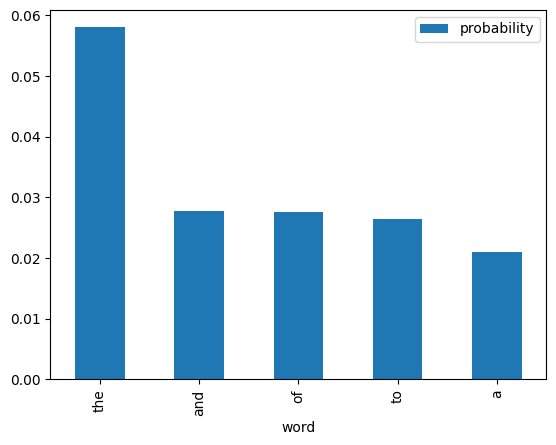

In [58]:
prob_df = pd.DataFrame({'word': probs.keys(), 'probability': probs.values()}).sort_values(by='probability', ascending=False)
prob_df.sample(5)

prob_df.head().plot.bar(x='word', y='probability')

### Step 4.4: Replace Misspells with Correction

Write a function to replace misspelled words with the most probable corrections.

In [59]:

def get_corrections(word, probs, vocab, n=2, verbose=False):
    suggestions = []
    n_best = []

    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)

    best_words = sorted({s: probs[s] for s in suggestions}.items(), key=lambda x: x[1], reverse=True)
    n_best = best_words

    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)
    return n_best

def get_correct_word(word, vocab, probs, n):
    corrections = get_corrections(word, probs, vocab, n, verbose=False)
    if len(corrections) == 0:
        return word

    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word

get_correct_word('thatt', vocab, probs, 100)


'that'

### Step 5: Final Auto-Correction Function

Combine all parts into a final function that corrects sentences.

In [60]:
def autocorrect(sentence,vocab,probs):
  print("Input sentence : ", sentence)
  wrong_words = find_wrong_word(sentence, vocab)
  print("Wrong words : ", wrong_words)
  correct_words = []
  for word in sentence.strip().lower().split(" "):
    if word in wrong_words:
      correct_word = get_correct_word(word,vocab,probs,15)
      word = correct_word
    correct_words.append(word)

    print("Output Sentence : ", " ".join(correct_words).capitalize())

### Step 6: Demo

Apply your work to a sentence

In [67]:
autocorrect("whoss is teh bets?", vocab, probs)

Input sentence :  whoss is teh bets?
Wrong words :  ['whoss', 'teh', 'bets?']
Output Sentence :  Who
Output Sentence :  Who is
Output Sentence :  Who is the
Output Sentence :  Who is the best
